# **Dependecies**

The CSCV analysis depends on the following python packages:
- matplotlib  
- statsmodels

# **Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
from nautilus_trader.backtest.cscv_analysis import CSCV
from nautilus_trader.analysis.statistics.sharpe_ratio import SharpeRatio

# **Load Data**

A EMACrossTrailingStop Strategy is used as example,I perform backtesing of this strategy with different fast_ema_period and slow_ema_period,results are saved into
backtest_returns.csv. This pandas DataFrame's index is DatetimeIndex and each column represents one group of parameters' return on a certain day.

In [2]:
df = pd.read_csv("backtest_returns.csv",index_col=0)
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,strategy_0,strategy_1,strategy_2,strategy_3,strategy_4,strategy_5,strategy_6,strategy_7,strategy_8,strategy_9,...,strategy_20,strategy_21,strategy_22,strategy_23,strategy_24,strategy_25,strategy_26,strategy_27,strategy_28,strategy_29
2022-01-01,0.014994,0.000676,-0.000446,-0.006869,-0.005694,0.002345,-0.013804,0.004857,0.011062,0.013556,...,0.010136,0.003115,0.004857,0.011062,0.010051,0.011225,0.010136,0.003115,0.004857,0.011062
2022-01-02,-0.017739,-0.046200,-0.036625,-0.046200,-0.046200,-0.048463,-0.046200,-0.046200,-0.069283,-0.017739,...,-0.040998,-0.035574,-0.045670,-0.045670,-0.011476,-0.019771,-0.025195,-0.035574,-0.045670,-0.045670
2022-01-03,-0.012555,0.000031,-0.015186,-0.022143,-0.022646,-0.022646,-0.022646,-0.022646,-0.015669,-0.012555,...,-0.032539,-0.032539,-0.032539,-0.032539,-0.012555,-0.033797,-0.033797,-0.032539,-0.032539,-0.032539
2022-01-04,-0.000324,-0.021357,-0.008327,0.003624,0.003624,0.003624,0.003624,0.003624,0.003624,-0.000324,...,-0.009409,-0.009409,-0.009409,-0.009409,-0.000324,-0.009409,-0.009409,-0.009409,-0.009409,-0.020801
2022-01-05,-0.059122,0.034826,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.025916,-0.059122,...,0.025916,0.025916,0.025916,0.025916,-0.059122,0.025916,0.025916,0.025916,0.025916,0.019792


## **CSCV Analysis**

The Combinatorially Symmetric Cross-Validation (CSCV) was introduced in [1].CSCV is a framwork framework for estimating the  probability of backtest overfitting(PBO) for different type of  strategies.

### the Combinational Symmetric Cross Validation procedure
1. Collect a matrix $J_s$ of returns' time series for each strategy 
2. Split $J_s$ into S disjoint submatrices
    * for example, $J_s$ in [$J_1$, $J_2$, $J_3$, $J_4$,, ...]
3. Generate all combination $C_s$ from $J_s$
    * for example
        * training sets = [$J_1$ + $J_2$ ,   $J_1$ +$J_3$,   $J_1$ + $J_4$, ...] (in-sample)
        * testing   sets = [$J_3$ + $J_4$ ,   $J_2$ +$J_4$,   $J_2$ + $J_3$, ...] (out-of-sample)
4. Each c in $C_s$,
    1. compute in-sample and out-of-sample performance for each strategy 
    2. find the best in-sample strategy, and its corresponding out-of-sample performance
    3. Determine the relative rank of the out-of-sample perfoemance associated with the trial chosen in-sample, denoted by $\bar{w}_c$, where $\bar{w}_c \in (0,1)$; 
    4. compute the logit $\lambda_c = log(\frac{\bar{w}_c}{1-\bar{w}_c})$
5. compute the probability of backtest overfitting
    * $PBO = \int_{-\inf}^0 f(\lambda)\, d\lambda$

In [4]:
cv = CSCV(df,10)

In [5]:
cv.estimate()

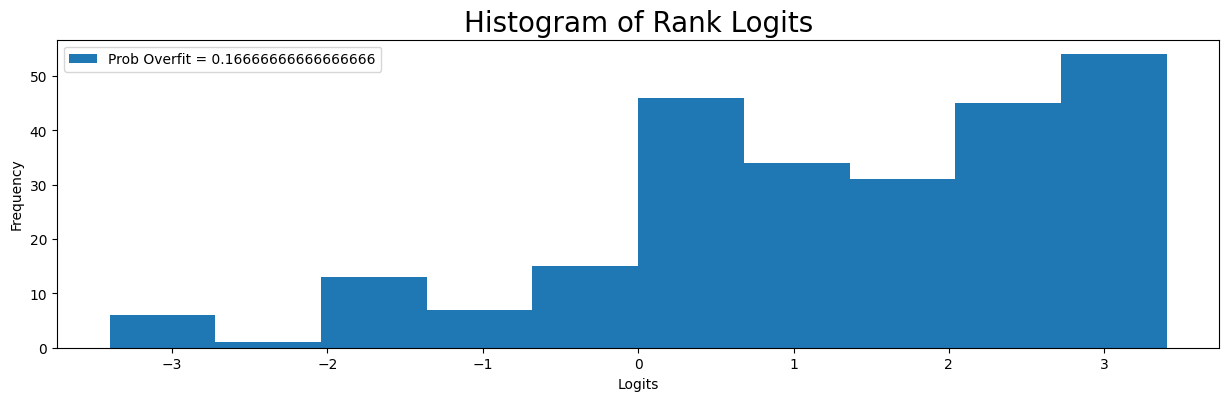

In [6]:
cv.plot_pbo()

As the figure shows that current parameters range for the EMACrossTrailingStop Strategy's probability of backtest overfitting is 16.7%

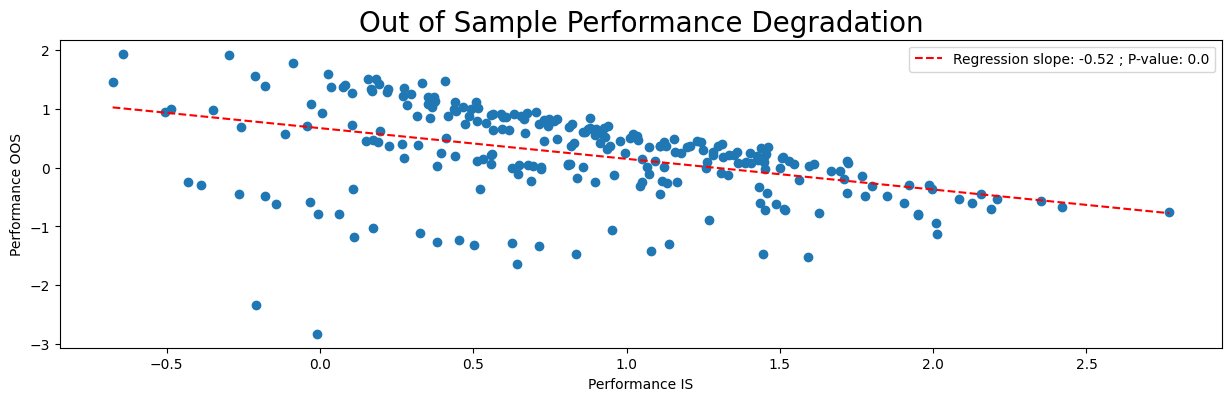

In [7]:
cv.plot_performance_degradation()

The last figure Perform a linear regression between the best in-sample strategy simulation performance and out-of-sample simulation performance,
the negetive slope indicates that current parameters range for the EMACrossTrailingStop Strategy might meet a performance degradation in the future.


<Figure size 1500x400 with 0 Axes>

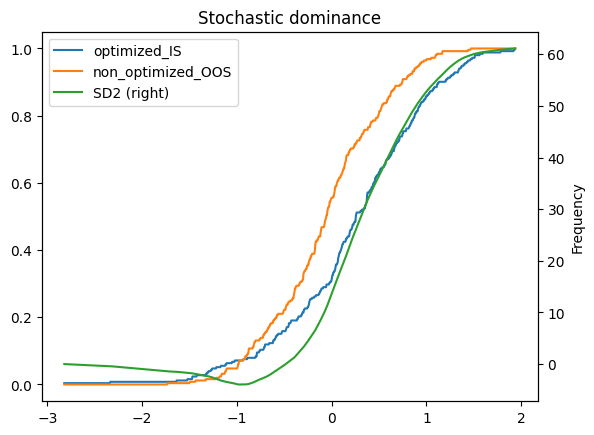

In [8]:
cv.plot_stochastic_dominance()

The last figure plot  cumulative distribution function of Sharp ratio for in sample and 
Out of sample set.We can see that in most case SD2 is bigger than 0,which indicates 
the EMACrossTrailingStop Strategy In-Sample performance is preferable to randomly choosing.

## **How to use it**

CSCV is used to compare different strategies performance,you can compute a CSCV for each strategy,as use 1.0/PBO as asset management weights.

# **References**

[1]. M. L. de Prado, Advances in financial machine learning (John Wiley & Sons, 2018).  

[2]. D. Bailey, J. Borwein, M. López de Prado and J. Zhu, “The probability of backtest overfitting,” working paper, 2013, http://ssrn.com/abstract=2326253.  

[3]. Bailey, D., J. Borwein, M. López de Prado and J. Zhu. “Pseudo-Mathematics and Financial Charlatanism: The Effects of Backtest Overfitting on Out-Of-Sample Performance.” Notices of the American Mathematical Society, Vol. 61, No. 5 (2014), pp. 458-471. Available at http://ssrn.com/abstract=2308659.